In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
from nim import Nim21Game
from network import DQN
from agent import DQNAgent

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle


def train_agents(episodes):
    env = Nim21Game()
    agent1 = DQNAgent()
    agent2 = DQNAgent()

    batch_size = 64
    update_target_frequency = 100

    for e in range(episodes):
        turn = random.choice([1, 2])
        start_turn = turn
        state = env.reset()
        state_hist = [state]
        action_hist = []
        reward_hist = []
        done_hist = []

        done = False
        while not done:
            current_agent = agent1 if turn == 1 else agent2
            action = current_agent.act(state)
            next_state, reward, done = env.step(action)
            action_hist.append(action)
            state_hist.append(next_state)
            reward_hist.append(reward)
            done_hist.append(done)

            state = next_state
            if done:
                break

            turn = 3 - turn  # (1 -> 2), (2 -> 1)

        state_hist.append(0)
        for turn, state, action, reward, next_state, done in zip(
            cycle([start_turn, 3 - start_turn]),
            state_hist[:-2],
            action_hist,
            reward_hist,
            state_hist[2:],
            done_hist,
        ):
            current_agent = agent1 if turn == 1 else agent2
            if next_state == 0:
                done = True

            current_agent.remember(state, action, reward, next_state, done)

        agent1.replay(batch_size)
        agent2.replay(batch_size)

        if e % 1000 == 0:
            print(f"episode={e}")

        if e % update_target_frequency == 0:
            # Update target nets of the agents
            agent1.target_net.load_state_dict(agent1.policy_net.state_dict())
            agent2.target_net.load_state_dict(agent2.policy_net.state_dict())

    return agent1, agent2


a1, a2 = train_agents(25000)

/Users/maurits/micromamba/envs/develop/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


episode=0
episode=1000
episode=2000
episode=3000
episode=4000
episode=5000
episode=6000
episode=7000
episode=8000
episode=9000
episode=10000
episode=11000
episode=12000
episode=13000
episode=14000
episode=15000
episode=16000
episode=17000
episode=18000
episode=19000
episode=20000
episode=21000
episode=22000
episode=23000
episode=24000


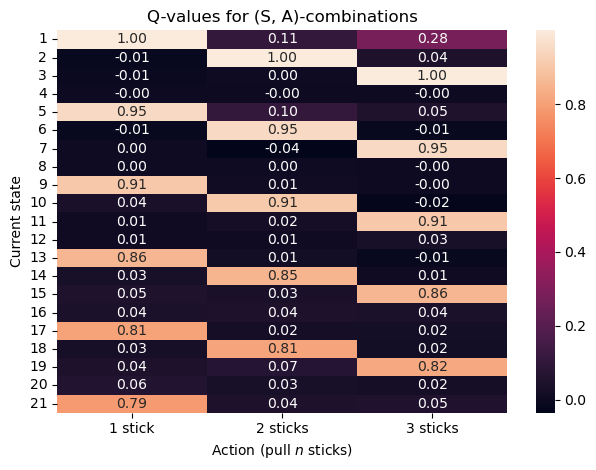

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch

sns.heatmap(
    pd.DataFrame(
        a2.policy_net(torch.tensor(list(range(1, 22)))).detach().numpy(),
        index=range(1, 22),
        columns=["1 stick", "2 sticks", "3 sticks"],
    ),
    annot=True,
    fmt=".2f",
)
plt.ylabel("Current state")
plt.xlabel("Action (pull $n$ sticks)")
plt.title("Q-values for (S, A)-combinations")
plt.tight_layout()
plt.savefig("./illustration.svg")

In [5]:
# Simulate game

turn = random.choice([1, 2])
env = Nim21Game()
state = env.reset()
done = False
while not done:
    current_agent = a1 if turn == 1 else a2
    action = current_agent.act(state)
    print(f"turn {turn}, state {state}, action {action}")
    next_state, reward, done = env.step(action)

    current_agent.remember(state, action, reward, next_state, done)

    state = next_state
    if done:
        break

    turn = 3 - turn  # (1 -> 2), (2 -> 1)

turn 1, state 21, action 1
turn 2, state 20, action 1
turn 1, state 19, action 3
turn 2, state 16, action 2
turn 1, state 14, action 2
turn 2, state 12, action 3
turn 1, state 9, action 1
turn 2, state 8, action 1
turn 1, state 7, action 3
turn 2, state 4, action 3
turn 1, state 1, action 1
